<a href="https://colab.research.google.com/github/yamaniyuda/Scientific-Computation/blob/main/computer-vision/getting_started_with_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with image**
*   Reading an image
*   Check image attributes like datatype and shape
*   Matrix representation of an image in Numpy
*   Color images and aplitting/merging image channels
*   Displaying images using matplotlib
*   Saving images

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image

%matplotlib inline

# **Download Assets**


The `download_and_unzip(...)` is used to download and extract the notebook assests.

In [5]:
def download_and_unzip(url, save_path):
  print(f"Downloading and extracting assets...", end="")

  # Downloading zip file using urllib package.
  urlretrieve(url, save_path)

  try:
    # Extracting zip file using the zipfile package
    with ZipFile(save_path) as z:
      # Extract ZIP file contents in the same directory.
      print(os.path.split(save_path))
      z.extractall(os.path.split(save_path)[0])

    print("Done")
  except Exception as e:
    print("\nInvalid file.", e)

In [6]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"learn-computer-vision/started-with-image/opencv_bootcamp_assets_NB1.zip")

# Download if assets ZIP does not exists.
if  not os.path.exists(asset_zip_path):
  download_and_unzip(URL, asset_zip_path)

Done


# **Display Image Directly**
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [7]:
# Display 18x18 pixel image.
Image(filename='learn-computer-vision/started-with-image/checkerboard_18x18.png')

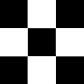

In [8]:
# Display 84x84 pixel image.
Image(filename='learn-computer-vision/started-with-image/checkerboard_84x84.jpg')

# **Reading images using OpenCV**
OpenCV allows reading different type of images (JPG,PNG,etc). You can load grascale images, color images or you can also load images with Alpha channel. It uses the 'cv2.imread()' function which has the following sysntax.

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```
`retval` : Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1.   `filename` : This can be an **absolute** or **relatie** path. This is a `mandatory argument`
2.   `Flags` : These flags are used to read an image in a particular format (for example, grayscale/color/with alpa channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the images as a color image.
Before we proceed with somme examples, let's also have a look at some of the `flags` availabe

**Flags**


1.   `Imread` : [Documentation link](https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
2.   `ImreadModes` : [Documentation link](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)

In [9]:
# Read image as gray scale.
cb_img = cv2.imread('learn-computer-vision/started-with-image/checkerboard_18x18.png', 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0, 255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

# Display Image attributes

In [10]:
# print the size of image
print('Image size (H, W) is:', cb_img.shape)

# print data-type of image
print('Data type of image is:', cb_img.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


# Display Images using Matplotlib

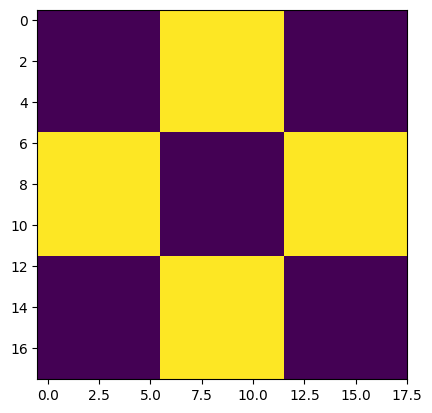

In [11]:
# Display image.
plt.imshow(cb_img)

# What happened
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()` . Matplotlib uses different color maps and it's possible that the gray scale color map is not set.

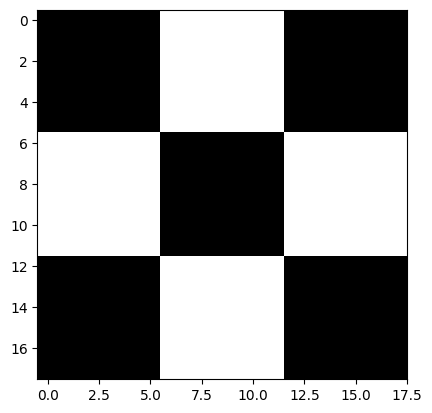

In [12]:
# Set color map  to gray scale for proper rendering
plt.imshow(cb_img, cmap="gray")

# Another example

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

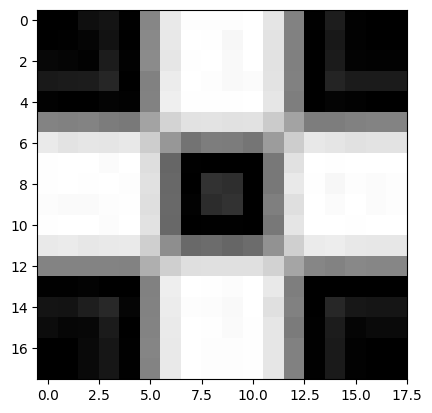

In [13]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("learn-computer-vision/started-with-image/checkerboard_fuzzy_18x18.jpg", 0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")

# Working with Colro Images

Until now,  we have been using gray scale images in our discussion. Let us now discuss color images.

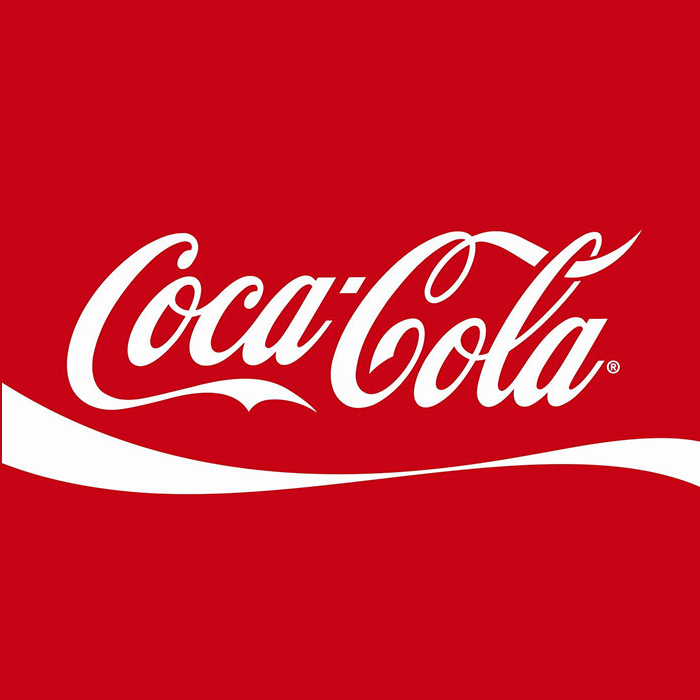

In [15]:
# Read and display Cola-Cola logo.
Image("learn-computer-vision/started-with-image/coca-cola-logo.png")

# Read and display color image

Let us read a color image and check the parameters. Note the image dimension.

In [16]:
# Read in image
coke_img = cv2.imread("learn-computer-vision/started-with-image/coca-cola-logo.png", 1)

# print the size of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


# Display the Image

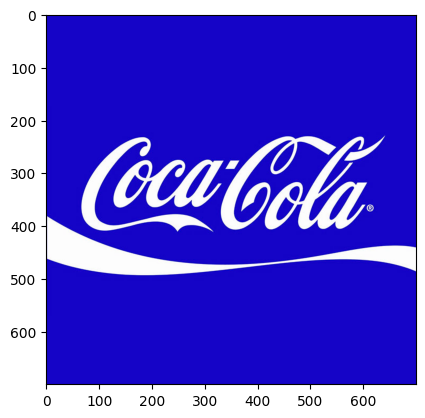

In [18]:
plt.imshow(coke_img)

The color displayed above is different from the actual image. This is bacause matplotlib expects the image in RGB fromat whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channeles of the image. We will discuss about the channels in the sections below.

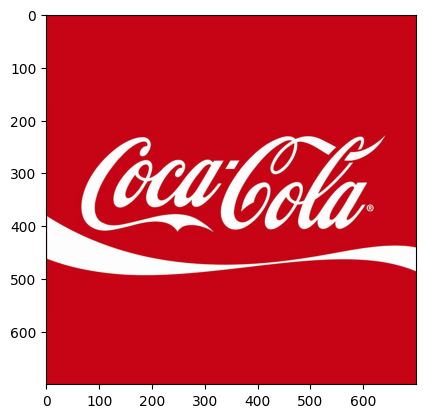

In [19]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

# Splitting and Merging Color Channels


*   `cv2.split()` Divides a multi-channel array into several single-channel arrays.
*   `cv2.merge()` Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font color="green">OpenCV Documentation</font>
[Documentation link](https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)


Text(0.5, 1.0, 'Merged Output')

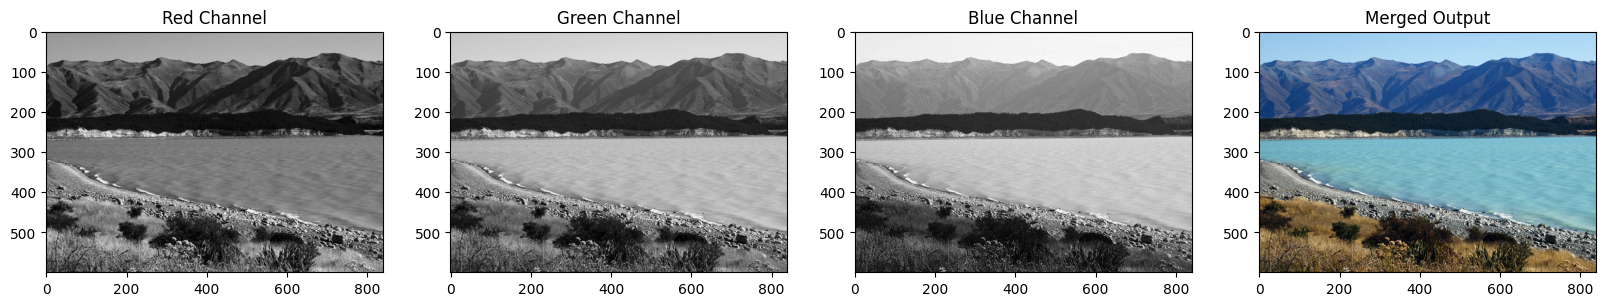

In [21]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread('learn-computer-vision/started-with-image/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

# Merge the individual channels into a BGR image
img_merged = cv2.merge((b, g, r))

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")
plt.subplot(144);plt.imshow(img_merged[:, :, ::-1]);plt.title("Merged Output")

# Converting to different Color Spaces
`cv2.cvtColor()` Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a trasformation to-from RGB color image will be an 8-bit Blue component, the second byte will be Green, and the thired byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font color="green">Function Syntax</font>
```python
dst = cv2.cvtColor( src, code )
```
`dst` : Is the output image of the same size and depth as `src`.

The functions has **2 required arguments**
1.   `src` input image : 8-bit unsigned, 16-bit unsigned (CV_16UC...), or signle-precision floating-point.
2.   `code` color space conversion code (see ColorCOnversionCodes)

